# <span style="color:blue"> Metodos Espectrais e Decomposição de Matrizes</span>
## <font color='blue'>Autovalores e Autovetores</font>

## <span style="color:blue">Solução dos Exercícios</span>
**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**

### Exercício 1) 
Mostre que para qualquer matriz $\mathbf{A}$ com colunas LI, a matriz $\mathbf{A}^\top\mathbf{A}$ é simétrica e semi-definida positiva.

**Solução**

A simetria é dada pela construção, pois o elemento da entrada ${ij}$ de $\mathbf{A}^\top\mathbf{A}$ é dado pelo produto escalar $\mathbf{a}_i^\top\mathbf{a}_j=\mathbf{a}_j^\top\mathbf{a}_i$, logo é igual ao elemento da entrada $ji$.

$$
\mathbf{x}^\top\mathbf{A}^\top\mathbf{A}\mathbf{x} = (\mathbf{A}\mathbf{x})^\top(\mathbf{A}\mathbf{x}) = \|\mathbf{A}\mathbf{x}\|^2 \geq 0
$$

Logo $\mathbf{A}^\top\mathbf{A}$ é semi-definida positiva.

### Exercício 2)
Construa uma matriz $\mathbf{A}$ definida positiva  $10\times 10$ e verifique que o produto $\mathbf{x}^\top\mathbf{A}\mathbf{x}>0$ para alguns vetores $\mathbf{x}$.

**Solução**

O teorema espectral diz que $\mathbf{A}=\mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^\top$, onde $\mathbf{Q}$ é ortogonal e $\mathbf{\Lambda}$ é diagonal com entradas diagonais positivas. Portanto,
se constuirmos uma matriz $\mathbf{\Lambda}$ e uma $\mathbf{Q}$ com as propriedades desejadas, o teorema espectral grante que $\mathbf{A}$ será definida positiva .

In [8]:
import numpy as np

X = np.random.uniform(0,1,size=(10,10))  # X é uma matriz qualquer com colunas LI 
                                         # pois sao geradas randomicamente e é muito
                                         # difícil serem linearmente dependentes

# fatozendo a fatoração QR de X, obtendo portanto uma matriz ortonormal Q
Q,R = np.linalg.qr(X)

# construindo a matriz Lambda
L = np.diag(np.random.uniform(0.1,2,10))

# calculando A
A = np.linalg.multi_dot([Q,L,Q.T])

# testando se A é definida positiva para 20 vetores dados como colunas de X
X = np.random.uniform(-1,1,size=(10,20))
FQ = []
for i in range(X.shape[1]):
   FQ.append(np.linalg.multi_dot([X[:,i].T,A,X[:,i]]))

print('Matrix é definida positiva?',np.all(np.array(FQ) > 0))

Matrix é definida positiva? True


### Exercício 3)
Construa uma transformação linear que mapeia o vetor $\mathbf{v}=[1,1,1,1,1]\in\mathbb{R}^5$ nele mesmo, ou seja, a transformação deve satisfazer 

$$
\mathbf{A}\mathbf{v}=\mathbf{v}
$$

In [13]:
# O vetor v=[1,1,1,1,1] deve ser um autovetor da transformação 
# com autovalor associado igual a 1.
# Para isso, construimos uma matriz com colunas LI sendo v uma das colunas

v = np.array([1,1,1,1,1])

# construindo a matriz com colunas LI garantindo v como a primeira coluna
S = np.random.randint(0,100,size=(5,5))
S[:,0] = v

det = np.linalg.det(S)
if det == 0:
    print('Gerar novos colunas randomicas para S, demos azar')
else:
    print('Construção bem sucedida')
    S_1 = np.linalg.inv(S)
    
    # Construindo a matriz de autovalores sendo o autovalor 1 na primeira posição
    d = np.random.uniform(0,1,5)
    d[0] = 1
    L = np.diag(d)

    # Constuindo a transformação
    A = np.linalg.multi_dot([S,L,S_1])

    # Garantindo que v é um autovetor
    print('A matriz de transformação é:\n',A)
    print('\n A imagem de [1,1,1,1,1] é:',np.dot(A,v))

Construção bem sucedida
A matriz de transformação é:
 [[ 1.09030425 -0.10298846  0.08537899  0.6269456  -0.69964038]
 [ 0.21324296  0.8556198   0.03025684  0.401891   -0.5010106 ]
 [ 0.21413481  0.05682829  0.83856217  0.26580719 -0.37533245]
 [ 0.26854643 -0.01822024  0.08333505  1.1712338  -0.50489504]
 [ 0.32241217 -0.1322609   0.12892678  0.57730649  0.10361546]]

 A imagem de [1,1,1,1,1] é: [1. 1. 1. 1. 1.]


### Exercício 4) 
Encontre a equação de uma elipse cujo o eixo maior está na direção do vetor $[1,1]$.

**Solução**

Os autovetores de uma matriz definida positiva $\mathbf{A}$ definem a elipse $\mathbf{x}^\top\mathbf{A}\mathbf{x}=1$, sendo que o maior eixo está na direção do autovetor associado ao menor autovalor. Assim, precisamos constuir uma matriz definida positiva cujo vetor $[1,1]$ é o autovetor associado ao menor autovalor.

In [12]:
import numpy as np
# Construindo uma matriz ortogonal 2x2 onde o vetor [1,1] (normalizado, ou seja, norma 1) é
# um o autovetor associado ao menor autovalor

# matriz ortonormal dos autovetores
Q = np.array([[1,1],[-1,1]]).T  # matriz ortogonal com [1,1] como uma das colunas
Q = Q/np.linalg.norm(Q,axis=0)  # normalizando as colunas para que tenham norma 1

# matriz diagonal dos autovalores, sendo que o menor autovalor corresponde a primeira coluna de Q
L = np.diag([0.1,1])

# Matriz definida positiva com [1,1] como autovetor associado ao menor autovalor
A = np.linalg.multi_dot([Q,L,Q.T])
np.set_printoptions(precision=2)
print('A matriz definida positiva é\n',A)

# Equação da elipse
print('A equação da elipse é\n','{:4.2f}'.format(A[0,0]),'xˆ2',\
      '{:4.2f}'.format(2*A[0,1]),'xy','+{:4.2f}'.format(A[1,1]),'yˆ2 = 1')

A matriz definida positiva é
 [[ 0.55 -0.45]
 [-0.45  0.55]]
A equação da elipse é
 0.55 xˆ2 -0.90 xy +0.55 yˆ2 = 1


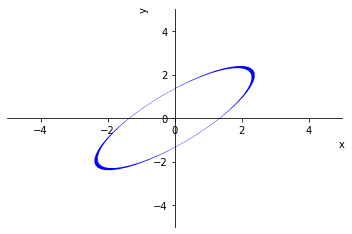

In [13]:
# desenhando a elipse
from sympy import symbols, Eq, plot_implicit

x,y = symbols('x y')
p1 = plot_implicit(Eq(A[0,0]*x**2+2*A[0,1]*x*y+A[1,1]*y**2,1))

### Exercício 5)
Encontre uma trasformação linear cujos autovetores são $v_1=[1,1]$ e $v_2=[1,-1]$ e os autovalores correspondentes são $a_1$ e $a_2$, respectivamente. Os valores de $a_1$ e $a_2$ devem ser escolhidos por você. Verifique graficamente o efeito desta transformação no círculo $x^2+y^2=1$.
O que acontece quando $a_1 = a_2$, $a_1 > a_2$ e $a_1 < a_2$?

In [18]:
# os vetores v1 e v2 são LI, logo podemos considerá-los como autovetores da transformação
# precisamos apenas definir os autovalores

S = np.array([[1,1],[1,-1]]).T
S_1 = np.linalg.inv(S)
L = np.diag([0.5,0.1])

# montando a transformação linear
A = np.linalg.multi_dot([S,L,S_1])

# gerando pontos no ciruclo
n = 100 # numero de pontos sobre o circulo
t = np.linspace(0,2*np.pi,n)
X = np.zeros((2,n))
X[0,:] = np.cos(t)
X[1,:] = np.sin(t)

# encontrando a transformacao de X
AX = np.dot(A,X)

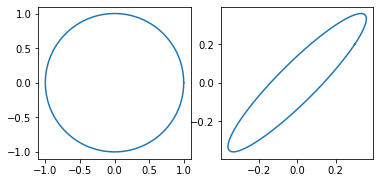

In [19]:
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2)
ax1.set_aspect('equal')
ax1.plot(X[0,:],X[1,:])

ax2.set_aspect('equal')
ax2.plot(AX[0,:],AX[1,:])

### Exercício 6)
Em muitos problemas reais, o que se busca é contrar o maior autovalor de uma matriz e seu correspondente autovetor. Vamos denotar os autovalores de uma matriz $\mathbf{A}$ em ordem decrescente $|\lambda_n|>|\lambda_{n-1}|\geq\ldots\geq|\lambda_1|$ e analisar o efeito de aplicar $\mathbf{A}$ sucessivamente a partir de um vetor qualquer (randomico) $\mathbf{x}$. Sendo $\mathbf{u}_n,\ldots,\mathbf{u}_1$ os autovalores correspondentes, temos que:

$$
\mathbf{x}=c_n\mathbf{u}_n+c_{n-1}\mathbf{u}_{n-1}+\cdots+c_1\mathbf{u}_1\\
\downarrow\\
\mathbf{x}^1=\mathbf{A}\mathbf{x} = c_n\mathbf{A}\mathbf{u}_n+c_{n-1}\mathbf{A}\mathbf{u}_{n-1}+\cdots+c_1\mathbf{A}\mathbf{u}_1 = c_n\lambda_n\mathbf{u}_n+c_{n-1}\lambda_{n-1}\mathbf{u}_{n-1}+\cdots+c_1\lambda_1\mathbf{u}_1\\
\downarrow\\
\mathbf{x}^2=\mathbf{A}\mathbf{x}^1=c_n\lambda_n^2\mathbf{u}_n+c_{n-1}\lambda_{n-1}^2\mathbf{u}_{n-1}+\cdots+c_1\lambda_1^2\mathbf{u}_1\\
\downarrow\\
\vdots\\
\downarrow\\
\mathbf{x}^k=\mathbf{A}\mathbf{x}^{k-1}=c_n\lambda_n^k\mathbf{u}_n+c_{n-1}\lambda_{n-1}^{k}\mathbf{u}_{n-1}+\cdots+c_1\lambda_1^k\mathbf{u}_1 = \\
\lambda_n^k\left(c_n\mathbf{u}_n+(\frac{\lambda_{n-1}}{\lambda_{n}})^k \mathbf{u}_{n-1}+\cdots+ (\frac{\lambda_{1}}{\lambda_{n}})^k \mathbf{u}_{1}  \right)
$$

Como $\frac{\lambda_{i}}{\lambda_{n}}<1$ temos que $(\frac{\lambda_{i}}{\lambda_{n}})^k\rightarrow 0$ quando $k\rightarrow\infty$. Assim:

$$
\mathbf{x}^k=\mathbf{A}\mathbf{x}^{k-1}\rightarrow \lambda_n^k c_n\mathbf{u}_n
$$

Ou seja, $\mathbf{A}\mathbf{x}^{k-1}$ converge para o autovetor $\mathbf{u}_n$. Uma vez encontrada a aproximação do autovetor, podemos obter o autovalor pelo coeficiente de Rayleigh:

$$
\lambda_n = \frac{(\mathbf{x}^k)^\top\mathbf{A}\mathbf{x}^k}{(\mathbf{x}^k)^\top\mathbf{x}^k}
$$

O método acima para calcular o maior autovetor e autovalor é chamado de **método das potências**.

Implemente o método das potência e aplique-o para encontrar o maior autovetor e autovalor da  matriz $\mathbf{A}$ descrita abaixo. Compare seu resultado com o obtido pelo método <font color='blue'> eigh </font> do <font color='blue'> numpy </font>.

In [21]:
A = np.array([[ 0.59,  0.14,  0.18,  0.04,  0.13],
              [ 0.14,  1.14, -0.  ,  0.51,  0.45],
              [ 0.18, -0.  ,  0.56,  0.17, -0.02],
              [ 0.04,  0.51,  0.17,  0.99,  0.37],
              [ 0.13,  0.45, -0.02,  0.37,  1.14]])

In [22]:
def m_potencias(A,ninter=1000):  # realizamos 1000 iteracoes como padrão
    x = np.random.uniform(0,1,size=(A.shape[0],1))
    
    for i in range(ninter):
        x = np.dot(A,x)
        
    return(x)

In [24]:
Axn = m_potencias(A)
print(Axn)
print(Axn/np.linalg.norm(Axn))

L,S = np.linalg.eigh(A)
print(S[:,-1])

# Note que os resultados são muito diferentes, ou seja, o método das potências como 
# descrito acima não funciona como esperado (veja exercício 7)

[[1.54e+303]
 [7.01e+303]
 [8.03e+302]
 [5.98e+303]
 [6.36e+303]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[0.14 0.62 0.07 0.53 0.56]


### Exercício 7)
O método das potências como descrito no exercício 6) não funciona corretamente devido ao problema de overflow (ou underflow). A razão é que $\mathbf{A}\mathbf{x}^{k-1}\rightarrow \lambda_n^k c_n\mathbf{u}_n$, ou seja, a convergência é para um múltiplo do maior autovetor com fator multiplicador dado por $\lambda_n^k$. Portanto, se $\lambda>1$, este termo tende para infinito (overflow) e se $\lambda<1$ ele tende a zero (underflow). 

Para corrigir este problema, realiza-se uma normalização do vetor obtido a cada passo da iteração. 

Implemente a versão do método da potência com o termo de normalização e refaça os testes do exercício 6). 

In [25]:
def m_potencias_normalizado(A,ninter=1000):  # realizamos 1000 iteracoes como padrão
    x = np.random.uniform(0,1,size=(A.shape[0],1))
    
    for i in range(ninter):
        x = np.dot(A,x)
        x = x/np.linalg.norm(x)
        
    return(x)

In [26]:
Axn = m_potencias_normalizado(A)
Lxn = np.linalg.multi_dot([Axn.T,A,Axn])/np.dot(Axn.T,Axn)

L,S = np.linalg.eigh(A)

print('Autovetor\n')
print('Metodo das Potencias com Normalização\n',Axn[:,0])
print('Metodo eigh do numpy\n',S[:,-1])

print(print('Autovalor\n'))
print('Metodo das Potencias com Normalização\n',Lxn[0,0])
print('Metodo eigh do numpy\n',L[-1])

Autovetor

Metodo das Potencias com Normalização
 [0.14 0.62 0.07 0.53 0.56]
Metodo eigh do numpy
 [0.14 0.62 0.07 0.53 0.56]
Autovalor

None
Metodo das Potencias com Normalização
 2.0137861428570876
Metodo eigh do numpy
 2.0137861428570867
